# LSTM Model for Air Pollution Prediction

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
%load_ext tensorboard
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset_path = 'dataset_after_feature_engineering.csv'
y_column = 'PM25'
X_columns = ['temperature', 'precipitation',
       'humidity', 'cloudiness', 'pressure', 'temperature1', 'humidity1',
       'lcz', '1', '2', '3', '4', '5', '6', '8', '9', '10', 'A', 'B', 'D', 'E','traffic', 'Wx', 'Wy', 'max Wx', 'max Wy',
       'timestamp_s', 'Day sin', 'Day cos', 'Year sin', 'Year cos'] 

stratification_column = 'sensor'

date = 'date'


In [2]:
dataset_path = 'dataset_after_feature_engineering.csv'
y_column = 'PM25'
X_columns = ['temperature', 'precipitation',
       'humidity', 'cloudiness', 'pressure', 'temperature1', 'humidity1',
       'lcz','traffic', 'Wx', 'Wy', 'max Wx', 'max Wy',
       'timestamp_s', 'Day sin', 'Day cos', 'Year sin', 'Year cos'] 

stratification_column = 'sensor'

date = 'date'

In [53]:
# no lcz
dataset_path = 'dataset_after_feature_engineering.csv'
y_column = 'PM25'
X_columns = ['temperature', 'precipitation',
       'humidity', 'cloudiness', 'pressure', 'temperature1', 'humidity1',
       'traffic', 'Wx', 'Wy', 'max Wx', 'max Wy',
       'timestamp_s', 'Day sin', 'Day cos', 'Year sin', 'Year cos'] 

stratification_column = 'sensor'

date = 'date'

In [86]:
# no lcz and traffic
dataset_path = 'dataset_after_feature_engineering.csv'
y_column = 'PM25'
X_columns = ['temperature', 'precipitation',
       'humidity', 'cloudiness', 'pressure', 'temperature1', 'humidity1',
        'Wx', 'Wy', 'max Wx', 'max Wy',
       'timestamp_s', 'Day sin', 'Day cos', 'Year sin', 'Year cos'] 

stratification_column = 'sensor'

date = 'date'

## Loading the data

Loading

In [3]:
df = pd.read_csv(dataset_path)
df = df[df.notna()]
print(F"Number of records: {df.shape[0]}")
df.columns


Number of records: 374159


Index(['sensor', 'DateTime', 'PM25', 'temperature', 'precipitation',
       'humidity', 'cloudiness', 'pressure', 'temperature1', 'humidity1',
       'lcz', '1', '2', '3', '4', '5', '6', '8', '9', '10', 'A', 'B', 'D', 'E',
       'F', 'G', 'traffic', 'date', 'Wx', 'Wy', 'max Wx', 'max Wy',
       'timestamp_s', 'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

Reorder columns

In [4]:
df.insert(0, stratification_column,
          df.pop(stratification_column))

df = pd.concat([df.pop(x)
               for x in X_columns+[y_column, date, stratification_column]], axis=1)
df.head()


,temperature,precipitation,humidity,cloudiness,pressure,temperature1,humidity1,lcz,1,2,...,max Wx,max Wy,timestamp_s,Day sin,Day cos,Year sin,Year cos,PM25,date,sensor
0,-13,0,98,3,10057,10,91,5,0.0,0.23,...,-22.981333,-19.283628,1.609459e+09,-6.012051e-12,1.000000,0.010881,0.999941,61.3,2021-01-01,5
1,-18,0,98,5,10060,10,91,5,0.0,0.23,...,-28.190779,-10.260604,1.609463e+09,2.588190e-01,0.965926,0.011597,0.999933,319.9,2021-01-01,5
2,-12,0,98,2,10062,0,91,5,0.0,0.23,...,-25.980762,-15.000000,1.609466e+09,5.000000e-01,0.866025,0.012314,0.999924,121.3,2021-01-01,5
3,-6,0,98,8,10060,0,91,5,0.0,0.23,...,-22.981333,-19.283628,1.609470e+09,7.071068e-01,0.707107,0.013031,0.999915,119.0,2021-01-01,5
4,2,0,98,8,10061,0,91,5,0.0,0.23,...,-25.980762,-15.000000,1.609474e+09,8.660254e-01,0.500000,0.013747,0.999905,139.1,2021-01-01,5


Describe

In [89]:
column_list = list(df.columns)  # Convert the columns attribute to a list

print(column_list)  # Print the list of column names

['temperature', 'precipitation', 'humidity', 'cloudiness', 'pressure', 'temperature1', 'humidity1', 'Wx', 'Wy', 'max Wx', 'max Wy', 'timestamp_s', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'PM25', 'date', 'sensor']


In [5]:
df = df[df["PM25"] < 80]

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,373268.0,1.131604e+02,6.449613e+01,-9.700000e+01,6.600000e+01,1.110000e+02,1.610000e+02,3.540000e+02
precipitation,373268.0,8.640066e-01,5.452383e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.650000e+02
humidity,373268.0,7.854402e+01,1.466928e+01,2.200000e+01,6.900000e+01,8.200000e+01,9.000000e+01,1.000000e+02
cloudiness,373268.0,6.019600e+00,3.102797e+00,0.000000e+00,4.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00
pressure,373268.0,1.016439e+04,9.982838e+01,9.797000e+03,1.010300e+04,1.017200e+04,1.023300e+04,1.045500e+04
temperature1,373268.0,1.382247e+02,6.804658e+01,-9.700000e+01,9.000000e+01,1.400000e+02,1.900000e+02,4.200000e+02
humidity1,373268.0,8.252659e+01,1.597395e+01,2.200000e+01,7.200000e+01,8.600000e+01,9.600000e+01,1.000000e+02
lcz,373268.0,6.817137e+00,3.184177e+00,2.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00,1.500000e+01
1,373268.0,1.922380e-02,4.865879e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e-01
2,373268.0,6.015378e-02,1.365761e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-02,5.100000e-01


### Split train and test
#### separate two last months data for testing set

In [7]:
import pandas as pd

# Assuming your date column is already in datetime format
df['date'] = pd.to_datetime(df['date'])

cut_line = pd.to_datetime('2022-11-01')

training_mask = df['date'] < cut_line
test_mask = (df['date'] >= cut_line) & (df['date'] <= '2022-12-31')

train_df = df[training_mask]
print(f"Number of train records: {train_df.shape[0]}")

test_df = df[test_mask]
print(f"Number of test records: {test_df.shape[0]}")


Number of train records: 339690
Number of test records: 33578


## Normalization

In [8]:
t_mean = train_df[X_columns].mean()
t_std = train_df[X_columns].std()
train_df[X_columns] = (train_df[X_columns] - t_mean) / t_std
test_df[X_columns] = (test_df[X_columns] - t_mean) / t_std

/tmp/ipykernel_386/3923520792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[X_columns] = (train_df[X_columns] - t_mean) / t_std
/tmp/ipykernel_386/3923520792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[X_columns] = (test_df[X_columns] - t_mean) / t_std


In [9]:
#remove the date column

train_df = train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)

## Windowing

In [11]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, test_df=test_df,
                 label_columns=None, stratification_column=None):
        # Store the raw data.
        self.train_df = train_df
        self.test_df = test_df

        # Work out the label column indices.
        self. label_columns =  label_columns
        if  label_columns is not None:
            self. label_columns_indices = {name: i for i, name in
                                          enumerate (label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        # stratification_column
        self.stratification_column = stratification_column
        if not self.stratification_column is None:
            # ToDo: Check if the stratification_column is the last column or not. If not throw an exception
            pass

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[
            self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[
            self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self. label_columns}'])


def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self. label_columns is not None:
        labels = tf.stack([labels[:, :, self.column_indices[name]]
                           for name in self. label_columns], axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels


def make_dataset(self, data):

    def make_timeseries_dataset(data):
        data_np = None
        data_np = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data_np,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=128,)

        return ds.map(self.split_window)

    if self.stratification_column is None:
        return make_timeseries_dataset(data)
    else:
        ds = None
        gb = data.groupby([self.stratification_column])
        for group_name, df_group in gb:
            if ds is None:
                ds = df_group.drop(columns=[self.stratification_column])
                ds = make_timeseries_dataset(ds)
            else:
                n_ds = df_group.drop(columns=[self.stratification_column])
                ds = ds.concatenate(make_timeseries_dataset(n_ds))

        return ds


@property
def train(self):
    return self.make_dataset(self.train_df)


@property
def test(self):
    return self.make_dataset(self.test_df)


@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result


WindowGenerator.split_window = split_window
WindowGenerator.make_dataset = make_dataset
WindowGenerator.train = train
WindowGenerator.test = test
WindowGenerator.example = example

In [12]:
wide_window = WindowGenerator(
    input_width=24, label_width=1, shift=1,
     label_columns=['PM25'], stratification_column=stratification_column)
wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['PM25']

In [13]:
test_dataset = wide_window.test

2023-06-27 20:01:02.286910: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


## Load Models trained with all variables

In [14]:
from tensorflow.keras.models import load_model

# Load the saved model
lstm_model = load_model('lstm_model_best_weights5')

# Load the best weights
lstm_model.load_weights('lstm_best_weights5.h5')

In [ ]:
test_results = lstm_model.evaluate(test_dataset, verbose=1)
print(
        f'Test measures (best epoch): {test_results}')
y_pred_all = lstm_model.predict(test_dataset)

In [18]:
y_test = []
for inputs, targets in test_dataset:
    [y_test.append(x) for x in targets.numpy().flatten()]

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE for testing set

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_all))
print("Testing RMSE:", test_rmse)

# Calculate R-squared for testing set
test_r2 = r2_score(y_test, y_pred_all)
print("Testing R-squared:", test_r2)

Testing RMSE: 5.1560836
Testing R-squared: 0.7493122266522099


## Load Models trained without lcz

In [49]:
from tensorflow.keras.models import load_model

# Load the saved model
lstm_model = load_model('lstm_model_no_lcz')

# Load the best weights
lstm_model.load_weights('lstm_weights_no_lcz.h5')

In [65]:
test_results = lstm_model.evaluate(test_dataset, verbose=1)
print(
        f'Test measures (best epoch): {test_results}')
y_pred_no_lcz = lstm_model.predict(test_dataset)

270/270 [==============================] - 7s 12ms/step - loss: 27.5821 - mae: 3.2484
Test measures (best epoch): [27.58213233947754, 3.2484073638916016]
270/270 [==============================] - 5s 11ms/step


In [66]:
y_test = []
for inputs, targets in test_dataset:
    [y_test.append(x) for x in targets.numpy().flatten()]

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE for testing set

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_all))
print("Testing RMSE:", test_rmse)

# Calculate R-squared for testing set
test_r2 = r2_score(y_test, y_pred_all)
print("Testing R-squared:", test_r2)

Testing RMSE: 5.1560836
Testing R-squared: 0.7493122266522099


## Load Models trained without lcz and traffic

In [85]:
from tensorflow.keras.models import load_model

# Load the saved model
lstm_model = load_model('lstm_model_no_lcz_traffic')

# Load the best weights
lstm_model.load_weights('lstm_weights_no_lcz_traffic.h5')

In [100]:
test_results = lstm_model.evaluate(test_dataset, verbose=1)
print(
        f'Test measures (best epoch): {test_results}')
y_pred_no_lcz_traffic = lstm_model.predict(test_dataset)

270/270 [==============================] - 5s 12ms/step - loss: 27.4382 - mae: 3.2381
Test measures (best epoch): [27.43816566467285, 3.2381343841552734]
270/270 [==============================] - 6s 12ms/step


In [101]:
y_test = []
for inputs, targets in test_dataset:
    [y_test.append(x) for x in targets.numpy().flatten()]

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE for testing set

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_all))
print("Testing RMSE:", test_rmse)

# Calculate R-squared for testing set
test_r2 = r2_score(y_test, y_pred_all)
print("Testing R-squared:", test_r2)

Testing RMSE: 5.1560836
Testing R-squared: 0.7493122266522099


In [71]:
y_pred_all[0:5]

array([[16.004837],
       [18.822025],
       [16.860312],
       [17.390059],
       [17.574558]], dtype=float32)

In [72]:
y_pred_no_lcz[0:5]

array([[15.028028],
       [21.330236],
       [14.803423],
       [20.680353],
       [23.644236]], dtype=float32)

In [105]:
y_pred_no_lcz_traffic[0:5]

array([[13.848376],
       [16.352495],
       [21.099884],
       [18.360502],
       [20.168491]], dtype=float32)

In [104]:
y_test[0:5]

[19.2, 22.4, 19.6, 21.5, 19.7]

In [106]:
import numpy as np

# Calculate the residuals
residuals_all = y_pred_all.flatten() - y_test
residuals_no_lcz = y_pred_no_lcz.flatten() - y_test
residuals_no_lcz_traffic = y_pred_no_lcz_traffic.flatten() - y_test

# Calculate the mean and median residuals
mean_residual_all = np.mean(residuals_all)
mean_residual_no_lcz = np.mean(residuals_no_lcz)
mean_residual_no_lcz_traffic = np.mean(residuals_no_lcz_traffic)
median_residual_all = np.median(residuals_all)
median_residual_no_lcz = np.median(residuals_no_lcz)
median_residual_no_lcz_traffic = np.median(residuals_no_lcz_traffic)

# Print the results
print("Mean residual (all variables included):", mean_residual_all)
print("Mean residual (without LCZ variable):", mean_residual_no_lcz)
print("Mean residual (without LCZ and traffic variable):", mean_residual_no_lcz_traffic)
print("Median residual (all variables included):", median_residual_all)
print("Median residual (without LCZ variable):", median_residual_no_lcz)
print("Median residual (without LCZ and traffic variable):", median_residual_no_lcz_traffic)


Mean residual (all variables included): -0.27986515
Mean residual (without LCZ variable): -0.10518757
Mean residual (without LCZ and traffic variable): -0.24408056
Median residual (all variables included): 0.105097175
Median residual (without LCZ variable): 0.24489951
Median residual (without LCZ and traffic variable): 0.14322948


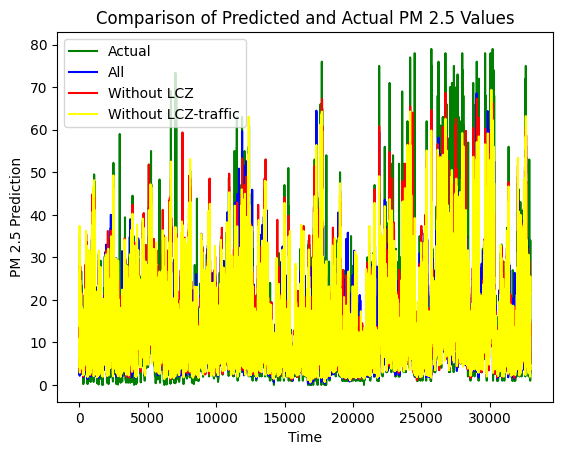

In [110]:
import matplotlib.pyplot as plt

# Prepare x-axis values (time) based on the length of y_test
x = range(len(y_test))

# Plot the actual values (y_test) in blue
plt.plot(x, y_test, color='green', label='Actual')

# Plot the predicted values from Model 1 in green
plt.plot(x, y_pred_all, color='blue', label='All')

# Plot the predicted values from Model 2 in red
plt.plot(x, y_pred_no_lcz, color='red', label='Without LCZ')

# Plot the predicted values from Model 2 in red
plt.plot(x, y_pred_no_lcz_traffic, color='yellow', label='Without LCZ-traffic')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('PM 2.5 Prediction')
plt.title('Comparison of Predicted and Actual PM 2.5 Values')

# Show legend
plt.legend()

# Display the plot
plt.show()


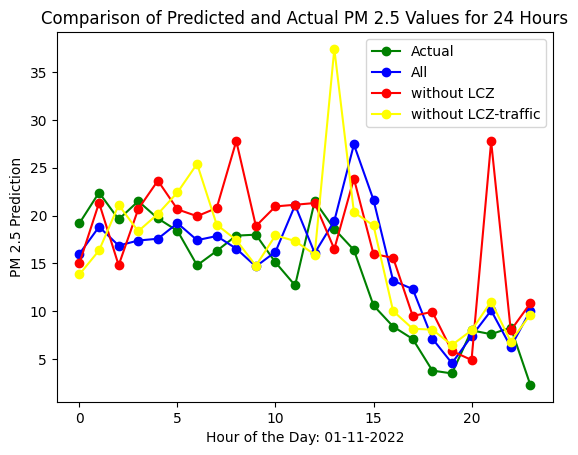

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare x-axis values (hours of the day)
x = np.arange(24)

# Plot the actual values (y_test) in blue
plt.plot(x, y_test[:24], color='green', marker='o', label='Actual')

# Plot the predicted values from Model 1 in green
plt.plot(x, y_pred_all[:24], color='blue', marker='o', label='All')

# Plot the predicted values from Model 2 in red
plt.plot(x, y_pred_no_lcz[:24], color='red', marker='o', label='without LCZ')

# Plot the predicted values from Model 2 in red
plt.plot(x, y_pred_no_lcz_traffic[:24], color='yellow', marker='o', label='without LCZ-traffic')


# Set labels and title
plt.xlabel('Hour of the Day: 01-11-2022')
plt.ylabel('PM 2.5 Prediction')
plt.title('Comparison of Predicted and Actual PM 2.5 Values for 24 Hours')

# Show legend
plt.legend()

# Display the plot
plt.show()


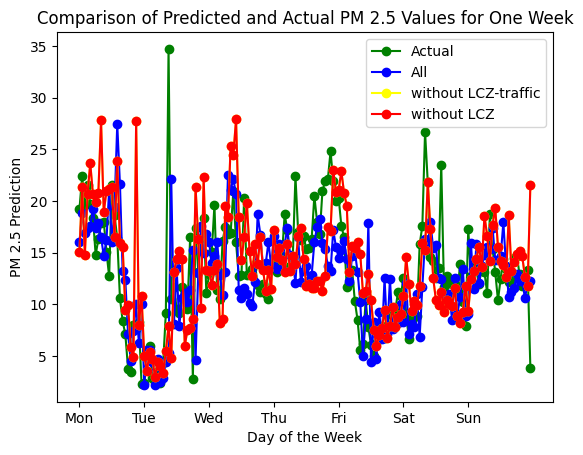

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare x-axis values (days of the week)
x = np.arange(7*24)  # Assuming 0 to 167 for 24 hours per day, 7 days in total

# Plot the actual values (y_test) in blue
plt.plot(x, y_test[:7*24], color='green', marker='o', label='Actual')

# Plot the predicted values from Model 1 in green
plt.plot(x, y_pred_all[:7*24], color='blue', marker='o', label='All')

# Plot the predicted values from Model 2 in red
plt.plot(x, y_pred_no_lcz[:7*24], color='yellow', marker='o', label='without LCZ-traffic')

# Plot the predicted values from Model 2 in red
plt.plot(x, y_pred_no_lcz[:7*24], color='red', marker='o', label='without LCZ')



# Set x-axis ticks and labels
plt.xticks(np.arange(0, 7*24, 24), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('PM 2.5 Prediction')
plt.title('Comparison of Predicted and Actual PM 2.5 Values for One Week')

# Show legend
plt.legend()

# Display the plot
plt.show()
